# Can we predict height from using acoustics?

In [44]:
#import libraries 
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
%matplotlib inline 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [14]:
#import data
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0


body = client_3731fb7cba6a429cba27010a648aca8a.get_object(Bucket='heightdatamodeling-donotdelete-pr-wft7itoxf99ql3',Key='stims.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Unnamed: 0,time,f1,f2,f3,f4,b1,b2,b3,b4,...,ntime,sf1,sf2,sf3,sf4,sf0,vowel,speaker,true height,gender
0,1,25.171171,976.90,1632.86,2636.22,4059.48,156.450106,222.210000,292.333892,294.941931,...,0.000000,974.765004,1636.908060,2624.342151,4079.103343,226.412835,a,11,69,F
1,2,28.144144,975.39,1631.37,2626.86,4065.88,156.447433,226.743485,303.320624,259.105758,...,0.014493,975.846417,1637.739555,2624.477781,4079.485941,226.371576,a,11,69,F
2,3,31.117117,976.52,1631.43,2619.63,4071.57,158.010292,231.238515,311.059737,237.521053,...,0.028986,979.024270,1640.188245,2624.878045,4080.604028,226.248368,a,11,69,F
3,4,34.090090,978.71,1633.49,2614.18,4077.81,159.782326,240.878601,309.315260,213.708116,...,0.043478,984.104022,1644.119611,2625.523514,4082.370601,226.044907,a,11,69,F
4,5,37.063063,984.71,1641.31,2612.90,4084.18,165.184203,251.804602,305.311886,200.772406,...,0.057971,990.776480,1649.318844,2626.383238,4084.647581,225.763988,a,11,69,F


In [3]:
#check for missing data
missing_data = df.isnull()
missing_data.head(5)

,Unnamed: 0,time,f1,f2,f3,f4,b1,b2,b3,b4,...,ntime,sf1,sf2,sf3,sf4,sf0,vowel,speaker,true height,gender
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Unnamed: 0
False    4079
Name: Unnamed: 0, dtype: int64

time
False    4079
Name: time, dtype: int64

f1
False    4079
Name: f1, dtype: int64

f2
False    4079
Name: f2, dtype: int64

f3
False    4079
Name: f3, dtype: int64

f4
False    4079
Name: f4, dtype: int64

b1
False    4079
Name: b1, dtype: int64

b2
False    4079
Name: b2, dtype: int64

b3
False    4079
Name: b3, dtype: int64

b4
False    4079
Name: b4, dtype: int64

f0
False    4079
Name: f0, dtype: int64

acf
False    4079
Name: acf, dtype: int64

pwr
False    4079
Name: pwr, dtype: int64

err
False    4079
Name: err, dtype: int64

cutoff
False    4079
Name: cutoff, dtype: int64

file
False    4079
Name: file, dtype: int64

token
False    4079
Name: token, dtype: int64

ntime
False    4079
Name: ntime, dtype: int64

sf1
False    4079
Name: sf1, dtype: int64

sf2
False    4079
Name: sf2, dtype: int64

sf3
False    4079
Name: sf3, dtype: int64

sf4
False    4079
Name: sf4, dtype: int64

sf0
False    4079
Name: sf0, dtype: int6

In [15]:
#check types in data frame
df.dtypes

Unnamed: 0       int64
time           float64
f1             float64
f2             float64
f3             float64
f4             float64
b1             float64
b2             float64
b3             float64
b4             float64
f0             float64
acf            float64
pwr            float64
err            float64
cutoff         float64
file            object
token            int64
ntime          float64
sf1            float64
sf2            float64
sf3            float64
sf4            float64
sf0            float64
vowel           object
speaker          int64
true height      int64
gender          object
dtype: object

In [16]:
#convert categorical to numerical variables 
dummy_variable_1 = pd.get_dummies(df["gender"])
dummy_variable_1.head()

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [22]:
# merge data frame "df" and "dummy_variable_1" 
df_merged = pd.concat([df, dummy_variable_1], axis=1)
df_merged.head()

,Unnamed: 0,time,f1,f2,f3,f4,b1,b2,b3,b4,...,sf2,sf3,sf4,sf0,vowel,speaker,true height,gender,F,M
0,1,25.171171,976.90,1632.86,2636.22,4059.48,156.450106,222.210000,292.333892,294.941931,...,1636.908060,2624.342151,4079.103343,226.412835,a,11,69,F,1,0
1,2,28.144144,975.39,1631.37,2626.86,4065.88,156.447433,226.743485,303.320624,259.105758,...,1637.739555,2624.477781,4079.485941,226.371576,a,11,69,F,1,0
2,3,31.117117,976.52,1631.43,2619.63,4071.57,158.010292,231.238515,311.059737,237.521053,...,1640.188245,2624.878045,4080.604028,226.248368,a,11,69,F,1,0
3,4,34.090090,978.71,1633.49,2614.18,4077.81,159.782326,240.878601,309.315260,213.708116,...,1644.119611,2625.523514,4082.370601,226.044907,a,11,69,F,1,0
4,5,37.063063,984.71,1641.31,2612.90,4084.18,165.184203,251.804602,305.311886,200.772406,...,1649.318844,2626.383238,4084.647581,225.763988,a,11,69,F,1,0


# Start modeling the data using simple linear regression and f0 as a predictor of height 

In [32]:
#build a simple regression model
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
X = df_merged[['f0']]
Y = df_merged['true height']

In [42]:
simple = lm.fit(X,Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.2718014558991828


In [ ]:
#So this model explains around 27.18% of the variation, not very good. 

In [43]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [63.78399907 63.81841866 63.85682916 63.91593273]


In [46]:
# compare the predicted results with the actual results
mse = mean_squared_error(df_merged['true height'], Yhat)
print('The mean square error of height and predicted value is: ', mse)

The mean square error of height and predicted value is:  12.132761154115922


# Build multiple linear regression using f1, f2, f3, f4, and f0

In [36]:
#build multiple linear regression
Z = df_merged[['f1', 'f2', 'f3', 'f4', 'f0']]

In [48]:
multiple = lm.fit(Z, Y)
# Find the R^2
print('The R-square is: ', lm.score(Z, df_merged['true height']))

The R-square is:  0.4166444623598857


In [ ]:
#This model explains 41.66% of the variation. So better than the simple linear regression. 

In [49]:
Y_predict_multifit = lm.predict(Z)

In [50]:
print('The mean square error of height and predicted value using multifit is: ', \
      mean_squared_error(df_merged['true height'], Y_predict_multifit))

The mean square error of height and predicted value using multifit is:  9.71948304958228


In [51]:
#mse is also smaller here, so a better model. 

# Split data to predict height using f1, f2, f3, f4, f0

In [52]:
%%capture
! pip install ipywidgets

In [53]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [55]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Height')
    plt.ylabel('Proportion of Speakers')

    plt.show()
    plt.close()

In [56]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Height')
    plt.legend()

In [57]:
y_data = df_merged['true height']

In [60]:
x_data=df.drop('true height',axis=1)

In [61]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 612
number of training samples: 3467


In [80]:
#are we over of underfitting?
lr = LinearRegression()
lr.fit(x_train[['f1', 'f2', 'f3', 'f4', 'f0']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [81]:
#Prediction using training data:

yhat_train = lr.predict(x_train[['f1', 'f2', 'f3', 'f4', 'f0']])
yhat_train[0:5]

array([69.24731871, 69.6799043 , 65.17644728, 71.74762991, 64.10856782])

In [84]:
#Prediction using test data:

yhat_test = lr.predict(x_test[['f1', 'f2', 'f3', 'f4', 'f0']])
yhat_test[0:5]

array([66.26053304, 67.77393789, 69.18580976, 62.972639  , 67.48705214])

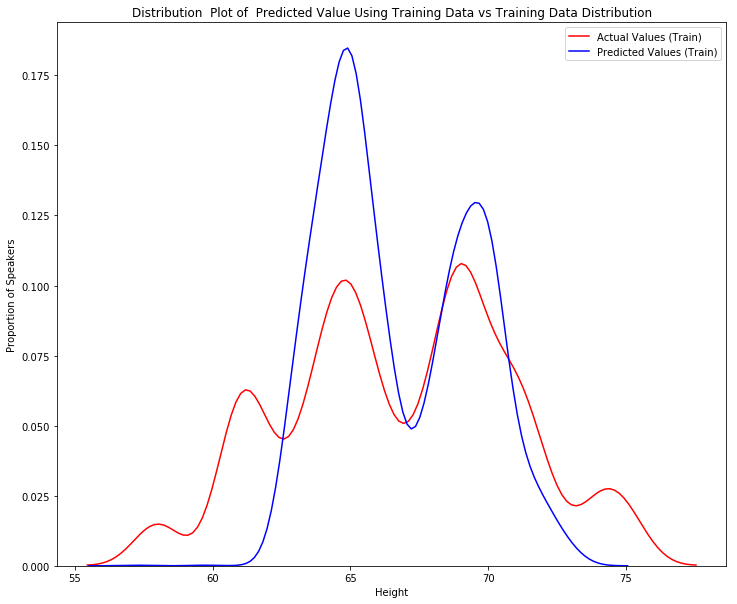

In [85]:
#examine the distribution of the predicted values of the training data.

Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

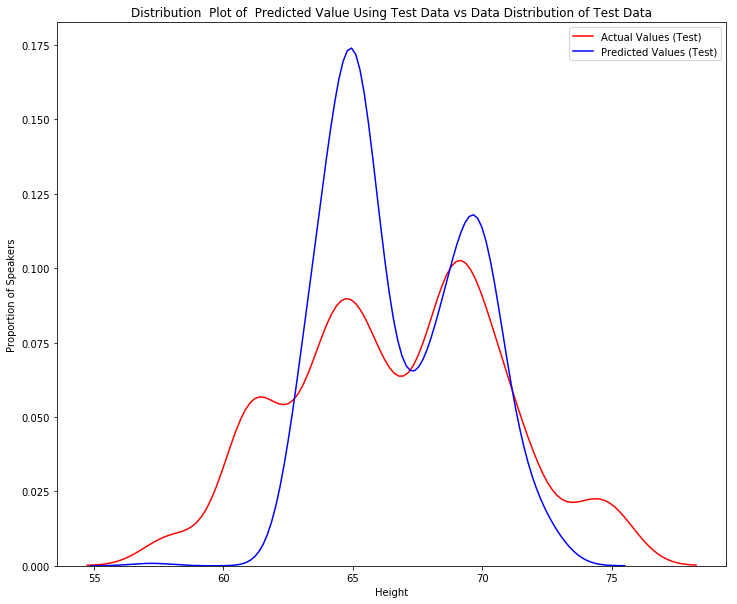

In [86]:
#what happens when the model encounters new data from the testing dataset? es.

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

# These plots look pretty bad, looks like our predictors aren't great at predicting height.

# Classification

In [145]:
#import libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [104]:
df_merged.shape

(4079, 29)

In [106]:
#replace categorical variable with numeric values
df['gender'].replace(to_replace=['M','F'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,time,f1,f2,f3,f4,b1,b2,b3,b4,...,ntime,sf1,sf2,sf3,sf4,sf0,vowel,speaker,true height,gender
0,1,25.171171,976.90,1632.86,2636.22,4059.48,156.450106,222.210000,292.333892,294.941931,...,0.000000,974.765004,1636.908060,2624.342151,4079.103343,226.412835,a,11,69,1
1,2,28.144144,975.39,1631.37,2626.86,4065.88,156.447433,226.743485,303.320624,259.105758,...,0.014493,975.846417,1637.739555,2624.477781,4079.485941,226.371576,a,11,69,1
2,3,31.117117,976.52,1631.43,2619.63,4071.57,158.010292,231.238515,311.059737,237.521053,...,0.028986,979.024270,1640.188245,2624.878045,4080.604028,226.248368,a,11,69,1
3,4,34.090090,978.71,1633.49,2614.18,4077.81,159.782326,240.878601,309.315260,213.708116,...,0.043478,984.104022,1644.119611,2625.523514,4082.370601,226.044907,a,11,69,1
4,5,37.063063,984.71,1641.31,2612.90,4084.18,165.184203,251.804602,305.311886,200.772406,...,0.057971,990.776480,1649.318844,2626.383238,4084.647581,225.763988,a,11,69,1


In [146]:
#select features for prediction
Feature = df[['f1','f2','f3','f4','f0', 'gender']]

In [108]:
X = Feature
X[0:5]

,f1,f2,f3,f4,f0,gender
0,976.90,1632.86,2636.22,4059.48,235.903886,1
1,975.39,1631.37,2626.86,4065.88,235.006913,1
2,976.52,1631.43,2619.63,4071.57,234.005937,1
3,978.71,1633.49,2614.18,4077.81,232.465701,1
4,984.71,1641.31,2612.90,4084.18,229.871941,1


In [109]:
y = df['true height'].values
y[0:5]

array([69, 69, 69, 69, 69])

# Classification

## Let's check different classification algorithms. 

### KNN

In [147]:
# KNN (k nearest neighbors)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

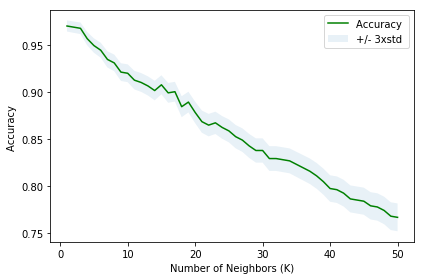

In [111]:
mean_acc=np.zeros(50)
std_acc = np.zeros(50)
for i in range(1,51):
    knnmodel=KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    y_pred=knnmodel.predict(X_test)
    mean_acc[i-1]=metrics.accuracy_score(y_test,y_pred)
    std_acc[i-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])
    
plt.plot(range(1,51),mean_acc,'g')
plt.fill_between(range(1,51),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [112]:
print( "Highest accuracy", mean_acc.max(), "with k=", mean_acc.argmax()+1)

Highest accuracy 0.9705882352941176 with k= 1


### Decision tree

In [113]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

In [114]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [115]:
y_pred=dt.predict(X_test)
Accuracy=metrics.accuracy_score(y_test,y_pred)
Accuracy

0.4950980392156863

### Support vector machine

In [116]:
#SVM (support vector machine)
from sklearn import svm
svm=svm.SVC(kernel='rbf', probability=True)
svm.fit(X_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [117]:
y_pred=svm.predict(X_test)
y_pred

array([69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 64, 69, 69, 69, 69,
       69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 65,
       69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69,
       69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69,
       69, 69, 69, 69, 69, 69, 69, 64, 69, 69, 69, 69, 69, 69, 69, 69, 69,
       69, 65, 69, 69, 69, 69, 69, 69, 65, 69, 69, 69, 69, 69, 69, 69, 69,
       69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69,
       69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69,
       69, 69, 69, 64, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69,
       69, 71, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69,
       69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69,
       69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69,
       69, 69, 69, 69, 69, 69, 69, 69, 69, 64, 69, 69, 69, 69, 69, 69, 69,
       69, 69, 69, 69, 69

In [118]:
metrics.accuracy_score(y_test,y_pred)

0.15931372549019607

### Logistic Regression

In [119]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr=LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [120]:
y_pred=lr.predict(X_test)
print(y_pred)
print(lr.predict_proba(X_test))

[64 65 69 61 71 72 64 69 62 61 69 69 64 65 69 64 61 65 64 75 64 65 69 65
 69 64 65 69 75 61 64 61 69 69 61 61 65 65 65 69 72 69 65 69 64 65 65 62
 69 61 64 65 71 69 65 65 62 69 71 65 75 69 62 69 69 69 72 65 65 62 65 69
 65 71 65 64 65 69 61 64 65 69 69 65 65 65 65 64 69 65 69 65 69 65 69 69
 61 64 65 69 65 64 64 69 69 69 69 69 61 64 64 62 69 65 62 69 61 69 65 61
 64 69 69 64 69 65 65 65 74 69 62 62 69 65 65 64 65 65 69 64 69 65 69 65
 69 69 69 69 69 69 62 69 64 64 61 69 69 65 64 64 72 65 64 71 69 65 65 69
 69 64 65 61 64 69 61 64 71 65 65 65 65 65 71 64 65 69 62 62 69 64 64 69
 69 65 65 64 69 64 69 65 69 64 64 62 65 62 65 69 65 69 75 72 64 65 61 64
 64 72 65 61 69 65 69 64 69 69 69 65 65 71 61 65 62 65 72 69 61 65 61 69
 69 62 64 64 72 65 64 65 61 72 72 64 64 69 64 69 62 64 72 61 69 69 69 65
 65 64 65 69 64 72 64 65 69 65 69 64 61 64 61 69 69 69 64 64 64 62 68 65
 69 61 65 65 65 65 61 61 65 64 69 69 64 65 65 69 65 69 65 69 71 69 65 61
 69 69 69 69 65 65 64 69 69 69 69 69 71 64 65 61 69

In [121]:
metrics.accuracy_score(y_test,y_pred)

0.29534313725490197

# Model Evaluation

In [138]:
#import libraries
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [139]:
#make variables 
yhat = lr.predict(X_test)
yhat
yhat_prob = lr.predict_proba(X_test)
yhat_prob

array([[1.80609668e-02, 1.62257871e-01, 4.00102849e-03, ...,
        7.82525030e-11, 6.29838109e-04, 4.72931563e-05],
       [1.37026497e-02, 7.10121619e-02, 1.92906040e-02, ...,
        2.53758304e-06, 7.84627775e-03, 3.32049248e-02],
       [3.16101503e-02, 1.78147884e-01, 7.93215867e-03, ...,
        1.63451729e-06, 7.37936689e-03, 2.90662895e-03],
       ...,
       [3.24339444e-02, 3.56113829e-01, 1.07409681e-02, ...,
        1.05955085e-06, 6.12548454e-03, 9.85490110e-04],
       [4.06844136e-02, 5.90470947e-02, 9.27334631e-03, ...,
        7.39520058e-03, 6.37072820e-02, 2.20762885e-02],
       [5.03705010e-02, 1.04743900e-01, 1.80947227e-01, ...,
        6.88012477e-10, 1.02322437e-02, 6.25316660e-03]])

In [140]:
#Check Jaccard score
jaccard_similarity_score(y_test, yhat)

0.29534313725490197

### jaccard is pretty bad (1.0 would indicate best classification accuracy)

In [141]:
log_loss(y_test, yhat_prob)

2.064320172922148

In [143]:
#log loss is pretty bad (we want to miniize this value)

In [142]:
f1_score(y_test, yhat, average='weighted') 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.23294983894692728

In [144]:
#f1 is pretty bad (1.0 would be the best score)

# After modeling, it seems that we can't predict height using acoustics. 